# Hdip_Giovana Froelich_2024

## 2. Data Preparation

First of all, in order to read and analyze the data set, I need to import some Python libraries.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
import plotly.express as px
import scipy.stats as stats 

In [2]:
df=pd.read_csv('healthcare_dataset.csv')

### 2.1 Characterisation of the Dataset

In [3]:
df.head()

,Age,BMI,BloodPressure,Cholesterol,Glucose,Insulin,HeartRate,Smoker,PhysicalActivity,SleepTime,MedicalHistoryScore,IncomeLevel,StressLevel,HealthIns,Disease
0,56,27.577099,88.0,108.0,92,171,75,0,Medium,9,5,High,Low,No,Disease_B
1,69,26.233744,88.0,252.0,102,179,71,0,High,9,3,High,Medium,Yes,Disease_A
2,46,29.646620,152.0,141.0,89,198,90,1,Low,5,5,Medium,Medium,No,Disease_C
3,32,30.619597,106.0,273.0,159,222,64,1,Medium,7,0,Medium,High,No,Disease_C
4,60,16.794395,96.0,172.0,173,30,99,1,Low,7,3,High,Medium,No,Disease_B


Now I'll have a look at the size of the dataset, the type and if there is or not missing values. 

In [4]:
df.shape

(5000, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  5000 non-null   int64  
 1   BMI                  4750 non-null   float64
 2   BloodPressure        4750 non-null   float64
 3   Cholesterol          4750 non-null   float64
 4   Glucose              5000 non-null   int64  
 5   Insulin              5000 non-null   int64  
 6   HeartRate            5000 non-null   int64  
 7   Smoker               5000 non-null   int64  
 8   PhysicalActivity     5000 non-null   object 
 9   SleepTime            5000 non-null   int64  
 10  MedicalHistoryScore  5000 non-null   int64  
 11  IncomeLevel          5000 non-null   object 
 12  StressLevel          5000 non-null   object 
 13  HealthIns            5000 non-null   object 
 14  Disease              3742 non-null   object 
dtypes: float64(3), int64(7), object(5)
mem

As we can see above, our data has 5,000 observations and 15 features, but we can also see that there are some missing values or null values. 

I compared the Dtypes with the dictionary and is everything ok, everything match. 

In [6]:
df.isnull().sum()

Age                       0
BMI                     250
BloodPressure           250
Cholesterol             250
Glucose                   0
Insulin                   0
HeartRate                 0
Smoker                    0
PhysicalActivity          0
SleepTime                 0
MedicalHistoryScore       0
IncomeLevel               0
StressLevel               0
HealthIns                 0
Disease                1258
dtype: int64

In [7]:
250*100/5000

5.0

I just checked the missing value in the data frame and I could eliminate the 250 rows of the three features that only have 250 missing values because they only represent 5% of the entire data set. 
But I'll explore a bit more to understand what this is.

In [8]:
df.describe()

,Age,BMI,BloodPressure,Cholesterol,Glucose,Insulin,HeartRate,Smoker,SleepTime,MedicalHistoryScore
count,5000.000000,4750.000000,4750.000000,4750.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,48.805600,27.332873,129.749053,199.611158,137.440600,146.573200,80.342000,0.510400,7.482200,4.485400
std,17.906991,7.190172,28.671508,58.173633,47.448072,82.623127,13.914919,0.499942,2.281562,2.852405
min,18.000000,15.000291,80.000000,100.000000,70.000000,15.000000,60.000000,0.000000,4.000000,0.000000
25%,34.000000,21.049709,105.000000,149.000000,103.000000,78.000000,70.000000,0.000000,5.000000,2.000000
50%,49.000000,27.218082,130.000000,201.000000,136.000000,144.000000,80.000000,1.000000,7.000000,4.000000
75%,64.000000,33.530189,155.000000,250.000000,167.000000,213.000000,89.000000,1.000000,9.000000,7.000000
max,79.000000,39.988943,179.000000,299.000000,582.000000,744.000000,198.000000,1.000000,11.000000,9.000000


Above we can see that it already has some maximum values ​​that do not correspond to the dictionary we have, I will need to explore this further.

### 2.2. Missing Values

I'll start dealing with my missing values, creating a pattern to make it easier to find the values.

In [9]:
missing_value_formats = ["n.a.","?","NA","n/a", "na", "--"]
df = pd.read_csv("healthcare_dataset.csv", na_values = missing_value_formats)

I'll call the first 60 rows to check whether the NA values are in the same rows or whether they are different between the 3 columns checked previously. 

In [10]:
df.head(60)

,Age,BMI,BloodPressure,Cholesterol,Glucose,Insulin,HeartRate,Smoker,PhysicalActivity,SleepTime,MedicalHistoryScore,IncomeLevel,StressLevel,HealthIns,Disease
0,56,27.577099,88.0,108.0,92,171,75,0,Medium,9,5,High,Low,No,Disease_B
1,69,26.233744,88.0,252.0,102,179,71,0,High,9,3,High,Medium,Yes,Disease_A
2,46,29.646620,152.0,141.0,89,198,90,1,Low,5,5,Medium,Medium,No,Disease_C
3,32,30.619597,106.0,273.0,159,222,64,1,Medium,7,0,Medium,High,No,Disease_C
4,60,16.794395,96.0,172.0,173,30,99,1,Low,7,3,High,Medium,No,Disease_B
5,25,32.065431,NaN,183.0,81,255,168,0,High,11,3,High,Low,Yes,NaN
6,78,21.048292,124.0,NaN,120,244,80,0,Medium,7,1,Low,High,Yes,Disease_C
7,38,32.848816,87.0,120.0,75,32,124,1,Medium,9,0,Low,Low,Yes,Disease_B
8,56,35.563370,159.0,249.0,160,161,69,1,Low,4,7,Low,Low,Yes,Disease_C
9,75,35.098963,97.0,256.0,138,258,82,0,Low,10,5,Low,High,Yes,Disease_C


In [11]:
(250+250+250)*100/5000

15.0

As we can see above, most of them are on different observations, but as some of them represent only 15% of the data set, I'll simply discard them.

In [12]:
df1=df.dropna(subset=['BMI','BloodPressure','Cholesterol'])

In [13]:
df1.shape

(4297, 15)

In [14]:
4297*100/5000

85.94

So this is the shape of the data set after I've eliminated the missing values. 

In [15]:
df1.isnull().sum()

Age                       0
BMI                       0
BloodPressure             0
Cholesterol               0
Glucose                   0
Insulin                   0
HeartRate                 0
Smoker                    0
PhysicalActivity          0
SleepTime                 0
MedicalHistoryScore       0
IncomeLevel               0
StressLevel               0
HealthIns                 0
Disease                1070
dtype: int64

Now, the only missing value we have is in Disease, I'll check what they are.

In [16]:
df1['Disease'].unique()

array(['Disease_B', 'Disease_A', 'Disease_C', nan], dtype=object)

If I take a look in the dictionary, I'll see that this nan is actually "None", so I'll replace it to follow the dictionary pattern. 

In [17]:
df1['Disease'] = df1['Disease'].fillna('None')

/var/folders/j3/cx6mmlb55xq40hncvggj96680000gn/T/ipykernel_22499/4276480518.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Disease'] = df1['Disease'].fillna('None')


In [18]:
df1['Disease'].value_counts()

Disease
Disease_B    1081
Disease_C    1078
None         1070
Disease_A    1068
Name: count, dtype: int64

### 2.3. Rename the Columns

In [19]:
df1=df1.rename(columns={"BloodPressure":"Blood Pressure","HeartRate":"Heart Rate","PhysicalActivity":"Physical Activity","SleepTime":"Sleep Time","MedicalHistoryScore":"Medical History Score","IncomeLevel":"Income Level","StressLevel":"Stress Level","HealthIns":"Health Ins"})

In [20]:
df1.head(2)

,Age,BMI,Blood Pressure,Cholesterol,Glucose,Insulin,Heart Rate,Smoker,Physical Activity,Sleep Time,Medical History Score,Income Level,Stress Level,Health Ins,Disease
0,56,27.577099,88.0,108.0,92,171,75,0,Medium,9,5,High,Low,No,Disease_B
1,69,26.233744,88.0,252.0,102,179,71,0,High,9,3,High,Medium,Yes,Disease_A


### 2.4. Outliers

As we can see in the boxplot below, we have some outliers that are easily recognized, as they differ from the range we were given in the dataset's dictionary. We have a few ways of dealing with them, excluding them, replacing them with the mean and median or even using some machine algorithm, I've done some tests and left the comments to record, after that I chose to leave them in my dataset because, as this is medical data, if I deal with them by altering the information, I will be altering our clients' data, making the algorithm unreliable, as with them I can pick up some correlation with a specific value of another variable.

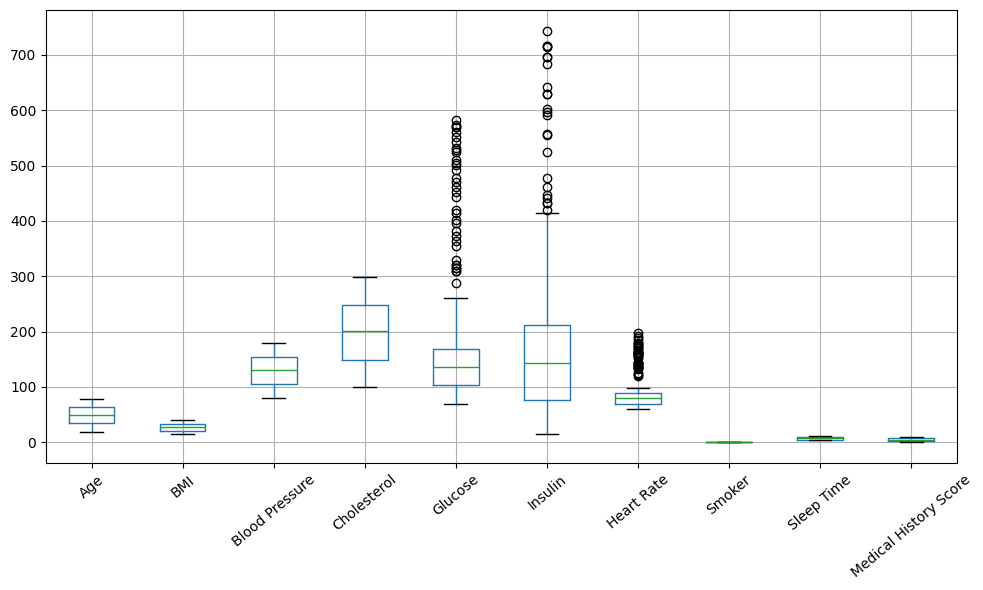

In [21]:
df1.boxplot(figsize=(10, 6))
plt.xticks(rotation=40)  
plt.tight_layout() 
plt.show()

In [22]:
# sns.displot(df1["Glucose"])

In [23]:
# more_than_200 = df1[df1['Glucose'] > 200]
# more_than_200.head()

In [24]:
# more_than_200.shape

In [25]:
# sns.displot(df1["Insulin"])

In [26]:
# more_than_276=df1[df1['Insulin'] > 276]
# more_than_276.head()

In [27]:
# more_than_276.shape

In [28]:
# sns.displot(df1["Heart Rate"])

In [29]:
# more_than_100=df1[df1['Heart Rate'] > 100]
# more_than_100.head()

In [30]:
# more_than_100.shape

In [31]:
# 41+30+41

In [32]:
# 112*100/5000

In [33]:
# df2=df1

In [34]:
# over_200 = 200
# df2 = df1.drop(df1[df1['Glucose'] > over_200].index)

In [35]:
# df2.shape

In [36]:
# over_276 = 276
# df2 = df2.drop(df2[df2['Insulin'] > over_276].index)

In [37]:
# df2.shape

In [38]:
# over_100 = 100
# df2 = df2.drop(df2[df2['Heart Rate'] > over_100].index)

In [39]:
# df2.shape

Checking below again to make sure the outliers have been excluded. 

In [40]:
# df2.boxplot(figsize=(10, 6))
# plt.xticks(rotation=40)  
# plt.tight_layout() 
# plt.show()

### 2.5. EDA (Exploratory data Analytics)

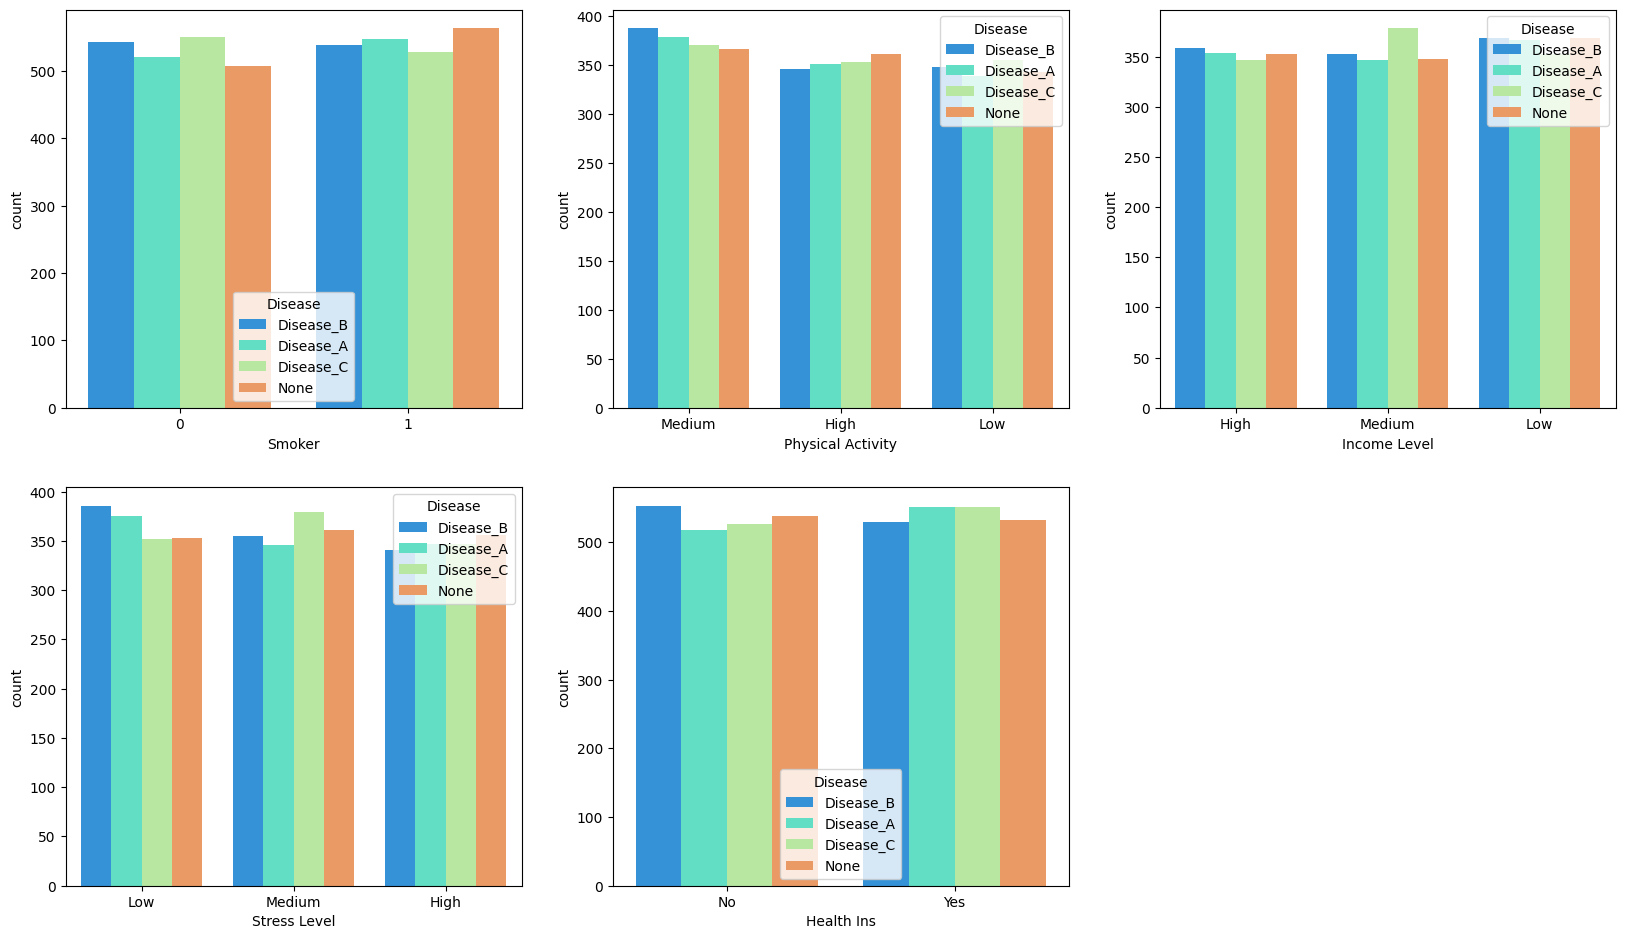

In [41]:
plt.figure(figsize=(20, 30))
i = 1
for feature in ["Smoker", "Physical Activity", "Income Level", "Stress Level", "Health Ins"]:
    plt.subplot(5, 3, i)
    sns.countplot(x=feature, hue='Disease', data=df1, palette='rainbow')
    i += 1

plt.show()

Above we can see that people who have disease A don't smoke, have an average level of physical activity and a low level of stress.

Disease B: most people smoke and have an average level of physical activity, as well as a low level of stress.

Disease C: most people don't smoke and do sport frequently, but have a medium level of stress. 

- Do the people who go to the doctor the most have paid health insurance?

In [42]:
c1 =pd.crosstab(df1["Health Ins"], df1["Medical History Score"])
c1['Total'] = c1.sum(axis=1)
c1.loc['Total Columns'] = c1.sum()
c1.style.background_gradient(cmap='Blues')

Medical History Score,0,1,2,3,4,5,6,7,8,9,Total
Health Ins,,,,,,,,,,,
No,206,213,221,219,234,213,207,224,190,207,2134
Yes,240,206,186,237,198,211,236,220,229,200,2163
Total Columns,446,419,407,456,432,424,443,444,419,407,4297


I'm going to follow the thinking of people with a score above 6, who go to the doctor the most, so we can see above,

Of these, 48.34% do not have health insurance.
Conversely, 51.66% of them have health insuranc.


- What is the income of people who pay for health insurance?

In [43]:
c2 = pd.crosstab(df1["Health Ins"], df1["Income Level"])
c2['Total'] = c2.sum(axis=1)
c2.loc['Total Rows'] = c2.sum()
c2_rows = c2.div(c2['Total'], axis=0).round(2)
c2_cols = c2.div(c2.loc['Total Rows'], axis=1).round(2)
print("Proportions in relation to the total of each line:")
print(c2_rows)
print("\nProportions in relation to the total of each column:")
print(c2_cols)

Proportions in relation to the total of each line:
Income Level  High   Low  Medium  Total
Health Ins                             
No            0.33  0.32    0.35    1.0
Yes           0.33  0.36    0.31    1.0
Total Rows    0.33  0.34    0.33    1.0

Proportions in relation to the total of each column:
Income Level  High   Low  Medium  Total
Health Ins                             
No            0.49  0.47    0.52    0.5
Yes           0.51  0.53    0.48    0.5
Total Rows    1.00  1.00    1.00    1.0


The results show that although there is a slight tendency for people with lower incomes to have less health insurance, this may mean that people with a higher level of income resort to private insurance doctors.

- Does the level of stress change according to monthly income?

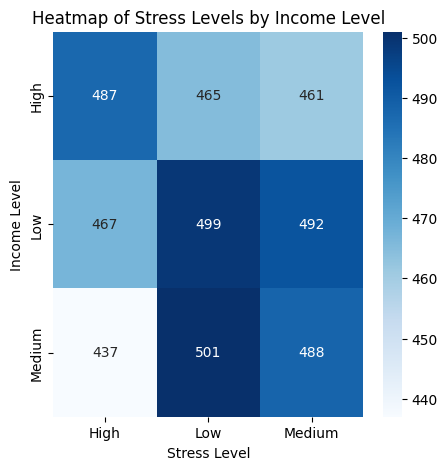

In [44]:
c3 = pd.crosstab(df1["Income Level"], df1["Stress Level"])
c3['Total'] = c3.sum(axis=1)
c3.loc['Total Columns'] = c3.sum()
plt.figure(figsize=(5, 5))
sns.heatmap(c3.iloc[:-1, :-1], annot=True, cmap='Blues', fmt='d')

plt.title('Heatmap of Stress Levels by Income Level')
plt.xlabel('Stress Level')
plt.ylabel('Income Level')
plt.show()

We can see that it's very balanced, the stress level doesn't actually change much between income levels. 

- Does the level of stress vary depending on whether the person is a smoker or not?

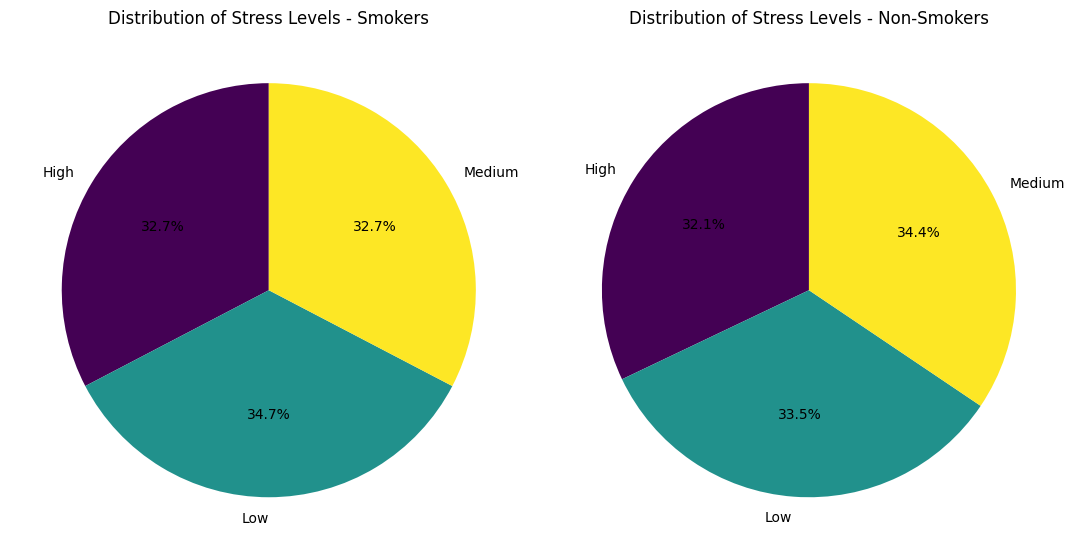

In [45]:
c4 = pd.crosstab(df1["Smoker"], df1["Stress Level"])
fig, axes = plt.subplots(1, 2, figsize=(11, 6))
c4_fumantes = c4.loc[1]
c4_fumantes.plot.pie(ax=axes[0], autopct='%1.1f%%', startangle=90, cmap='viridis', legend=None)
axes[0].set_ylabel('')
axes[0].set_title('Distribution of Stress Levels - Smokers')
c4_nao_fumantes = c4.loc[0]
c4_nao_fumantes.plot.pie(ax=axes[1], autopct='%1.1f%%', startangle=90, cmap='viridis', legend=None)
axes[1].set_ylabel('')
axes[1].set_title('Distribution of Stress Levels - Non-Smokers')
plt.tight_layout()
plt.show()


We can see a small increase in the number of relationships between people who smoke more and have a low level of stress, which suggests a scenario in which, despite practising the behaviour of smoking, these individuals do not have high levels of stress, but again, the data set is very balanced.

- What is the age with the highest number of smokers?

In [46]:
df1['Smoker'].value_counts()

Smoker
1    2177
0    2120
Name: count, dtype: int64

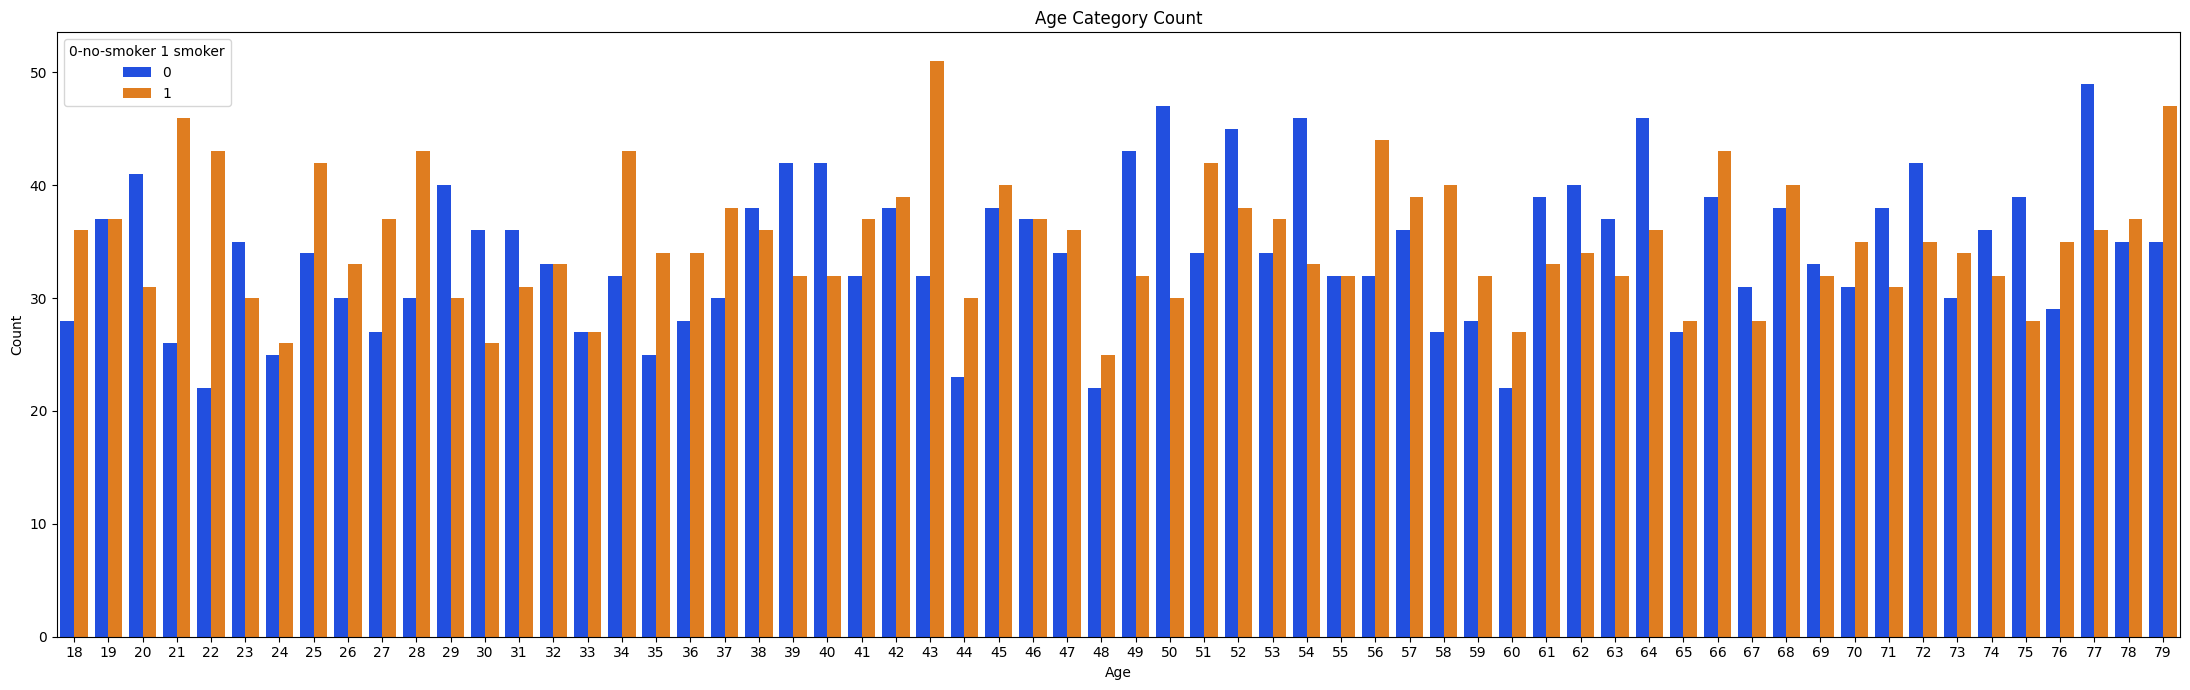

In [47]:
plt.figure(figsize=(22, 7))
sns.countplot(data=df1, x='Age', hue='Smoker', palette='bright')
plt.title('Age Category Count')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='0-no-smoker 1 smoker')
plt.tight_layout()
plt.show()

So we can see that, in this dataset, there are more smokers than non-smokers, there are approximately 50.67% smokers, but the dataset is well balanced when we look at the ages, but we can see a small increase in the number of smokers at ages 21,43 and 77, but that can happen because in this dataset there are more people with this ages. 

In [48]:
# plt.figure(figsize=(18, 6))
# plt.hist(df1['Age'], bins=range(df1['Age'].min(), df1['Age'].max() + 2), edgecolor='black', align='left')
# plt.xlabel('Age')
# plt.ylabel('Count')
# plt.title('Age distribution')
# plt.xticks(range(df1['Age'].min(), df1['Age'].max() + 1))
# plt.show()

### Does the level of stress vary according to the number of hours slept per day? 

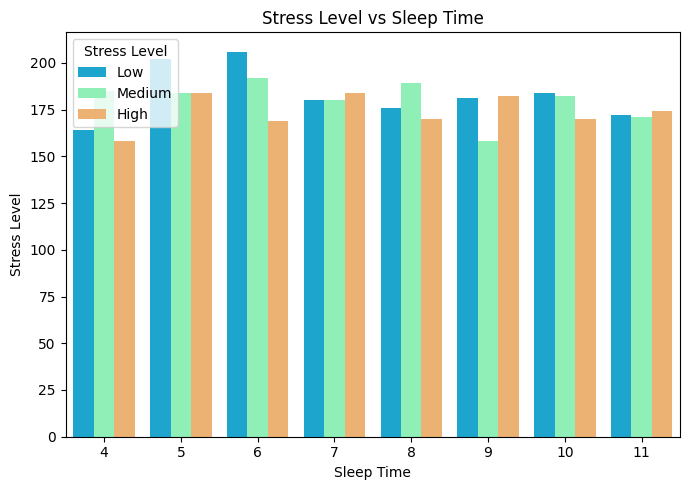

In [49]:
plt.figure(figsize=(7, 5))
sns.countplot(data=df1, x='Sleep Time', hue='Stress Level', palette='rainbow')
plt.title('Stress Level vs Sleep Time')
plt.xlabel('Sleep Time')
plt.ylabel('Stress Level')
plt.legend(title='Stress Level')
plt.tight_layout()
plt.show()

We can see that there isn't much difference in the level of stress compared to the number of hours slept per night. 

Below, I make a scatter plot to see if there is any relationship between Blood Pressure, age and Heart Rate, but again, the data set is very balanced and I can't get any insight.

<Axes: xlabel='Age', ylabel='Blood Pressure'>

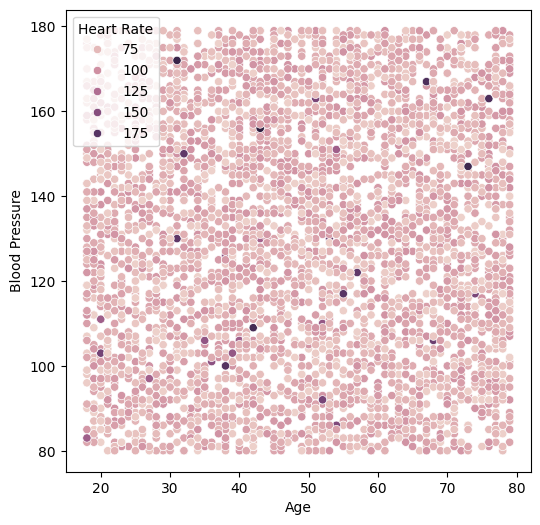

In [50]:
plt.figure(figsize=(6, 6))
sns.scatterplot(x="Age",y="Blood Pressure",hue ="Heart Rate",data = df1)

In [51]:
df1 = df1.reset_index(drop=True)

# Encoding

I need to encode the categorical variables of the dataset because most machine learning algorithms work well only with numerical data, so in order to preserve while allowing algorithms to process them effectively.

I'll create a list of the columns that I want to encode. 

In [52]:
columns_to_encode = ['Physical Activity', 'Income Level', 'Sleep Time', 'Stress Level','Medical History Score','Health Ins', 'Disease']

In [53]:
df2=df1

In order to know if it works, I'll call the first rowls with the head function

I'm going to apply the ordinal encoding, because how my columns follow a pattern like low/medium/hight is the best encoding way. 

In [54]:
from sklearn.preprocessing import OrdinalEncoder

Defining the order of categories for sorted columns

In [55]:
categories=[['Low', 'Medium', 'High'],         #Physical Activity
    ['Low', 'Medium', 'High'],         # Income Level
    ['Low', 'Medium', 'High'],  # Stress Level
    ['Disease_A','Disease_B','Disease_C','None']] #Disease


Next steps are:  
- Selecting the sorted columns
- Creating OrdinalEncoder with specified categories
- Applying ordinal coding to sorted columns 

In [56]:
encoder = OrdinalEncoder(categories=categories)

In [57]:
ordinal_columns = ['Physical Activity', 'Income Level', 'Stress Level', 'Disease']
encoder = OrdinalEncoder(categories=[categories[i] for i in range(len(ordinal_columns))])

In [58]:
df2[ordinal_columns] = encoder.fit_transform(df1[ordinal_columns])

And the dataset also has the binary column that is Health ins, so I'll apply the binary coding 

In [59]:
df2['Health Ins'] = df2['Health Ins'].map({'Yes': 1, 'No': 0})

In [60]:
df2.head()

,Age,BMI,Blood Pressure,Cholesterol,Glucose,Insulin,Heart Rate,Smoker,Physical Activity,Sleep Time,Medical History Score,Income Level,Stress Level,Health Ins,Disease
0,56,27.577099,88.0,108.0,92,171,75,0,1.0,9,5,2.0,0.0,0,1.0
1,69,26.233744,88.0,252.0,102,179,71,0,2.0,9,3,2.0,1.0,1,0.0
2,46,29.646620,152.0,141.0,89,198,90,1,0.0,5,5,1.0,1.0,0,2.0
3,32,30.619597,106.0,273.0,159,222,64,1,1.0,7,0,1.0,2.0,0,2.0
4,60,16.794395,96.0,172.0,173,30,99,1,0.0,7,3,2.0,1.0,0,1.0


In [61]:
df2 = df2.reset_index(drop=True)

Now that I have all the numerical columns, I'll check the correlation between the features and my target, which is the disease again. 

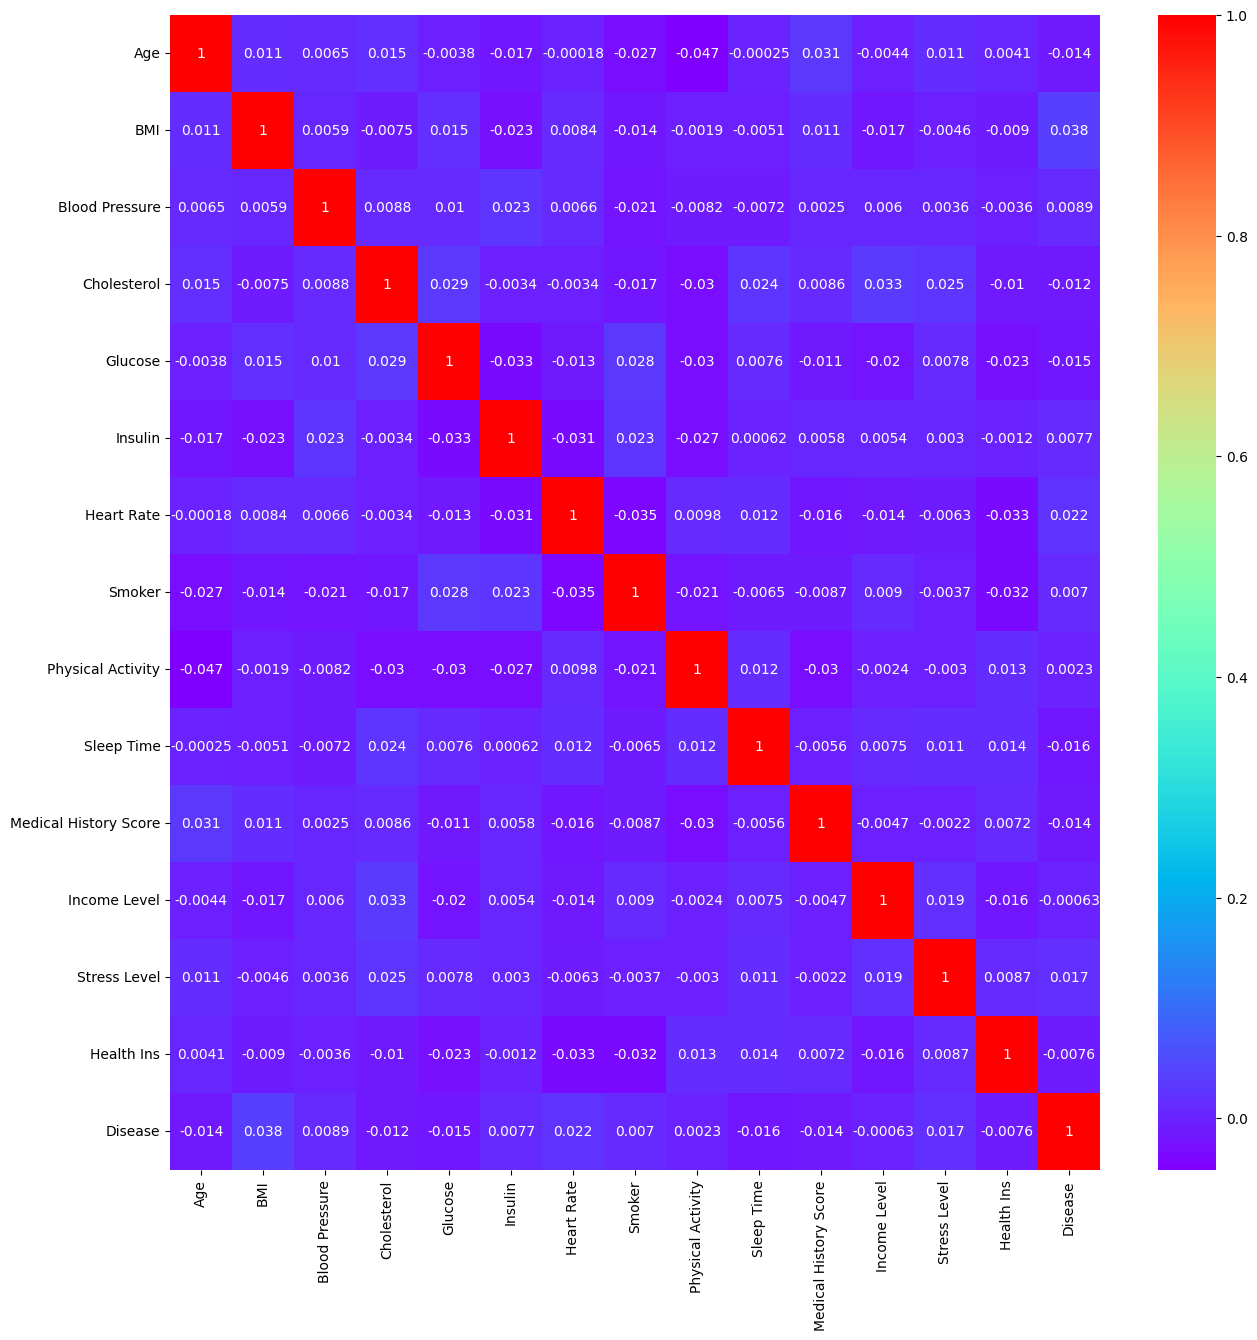

In [62]:
plt.figure(figsize=(15,15))
c = df2.corr()
sns.heatmap(c, cmap="rainbow", annot=True)
plt.show()

Above, we can see that there isn't a great correlation between the features, so this is something I'll need to check and understand after applying some machine learning algorithms.

I did some tests and saw that if I drop the columns below my dataset I'll get better accuracy with the PCA and LDA, and we can see in the heatmap above that these two columns are the ones that have the least correlation with the target, so I decided to drop them.

In [63]:
df4=df2.drop(columns=['Income Level','Health Ins'])

### 4. Scaling

To find out which sizing technique is the best option for my data set, I will apply a comparison of techniques to be sure of my decision. 

I'll start by importing all the necessary libraries and then create a list of the columns to which I want to apply the technique and another list of all the scaling techniques. 

In [64]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, PowerTransformer

In [65]:
columns_of_interest = ['Age', 'BMI', 'Blood Pressure', 'Cholesterol', 'Glucose', 'Insulin', 'Heart Rate']
df_selected = df4[columns_of_interest]

In [66]:
scalers = {
    'StandardScaler': StandardScaler(),
    'MinMaxScaler': MinMaxScaler(),
    'RobustScaler': RobustScaler(),
    'PowerTransformer (Yeo-Johnson)': PowerTransformer(method='yeo-johnson')}

I'll apply some scaling technique to the columns I've selected and then store the scaled data in df_scaled to plot my result. 

In [67]:
for scaler_name, scaler in scalers.items():
    df_scaled = pd.DataFrame(scaler.fit_transform(df_selected), columns=df_selected.columns)

The next steps are to plot my output from the sizer above. 

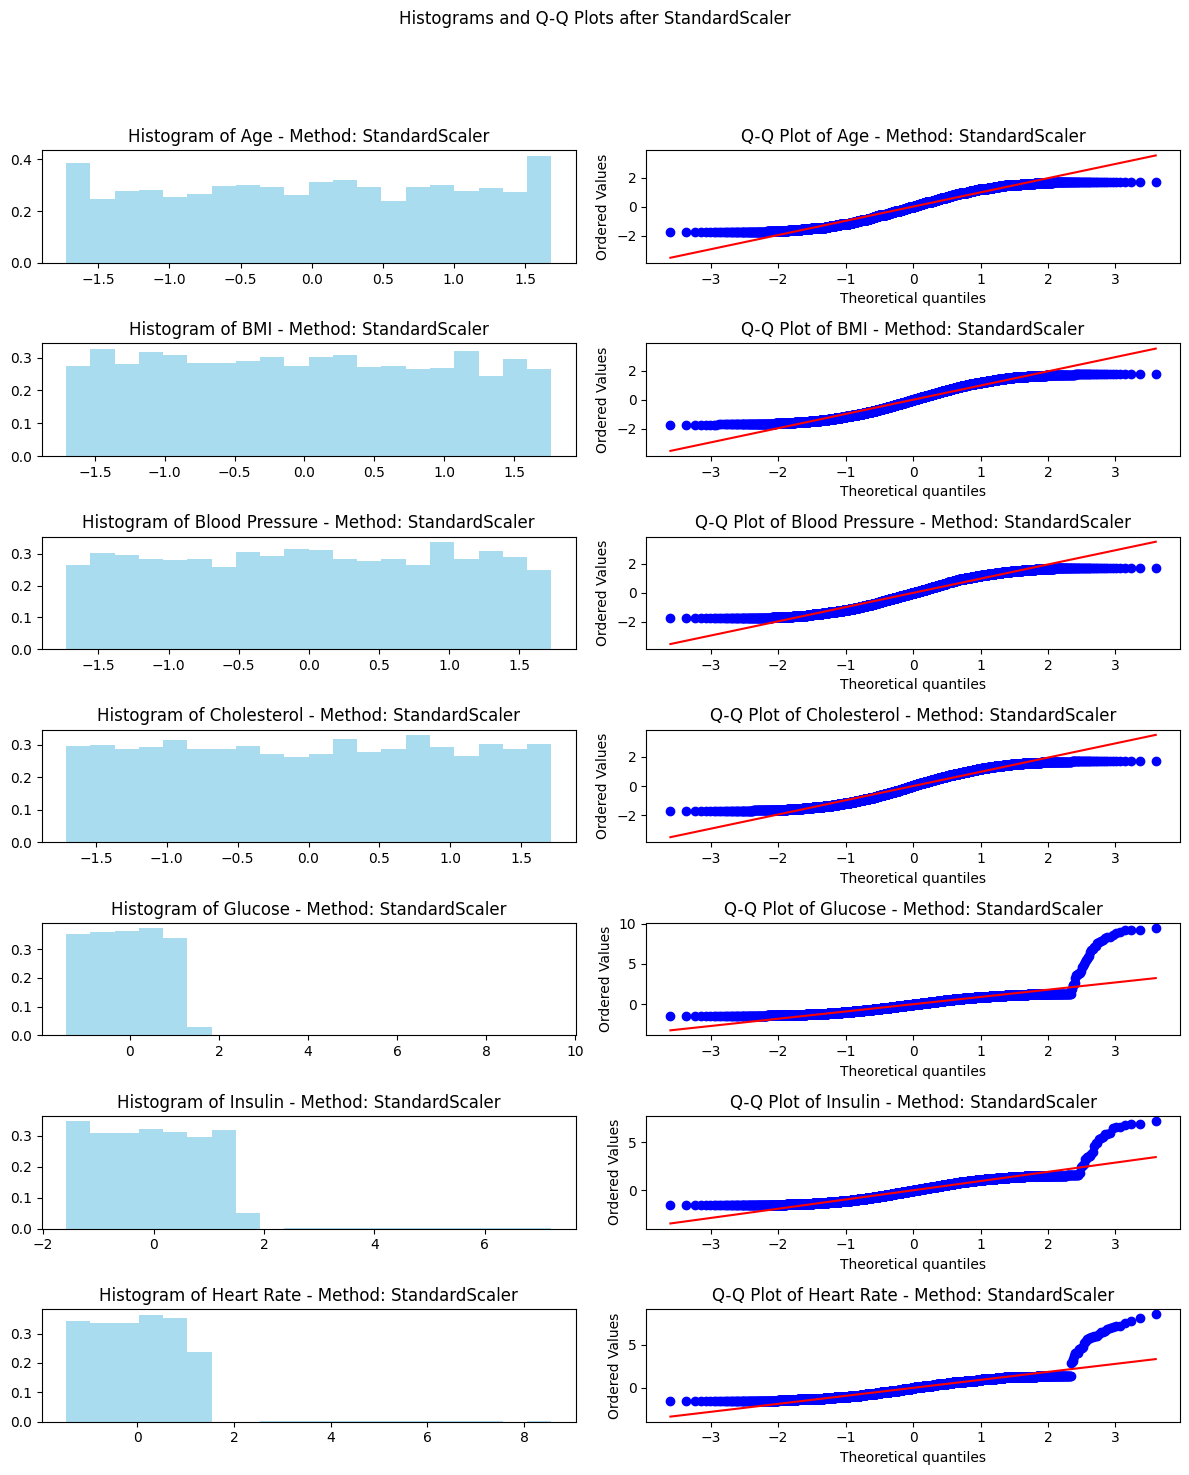

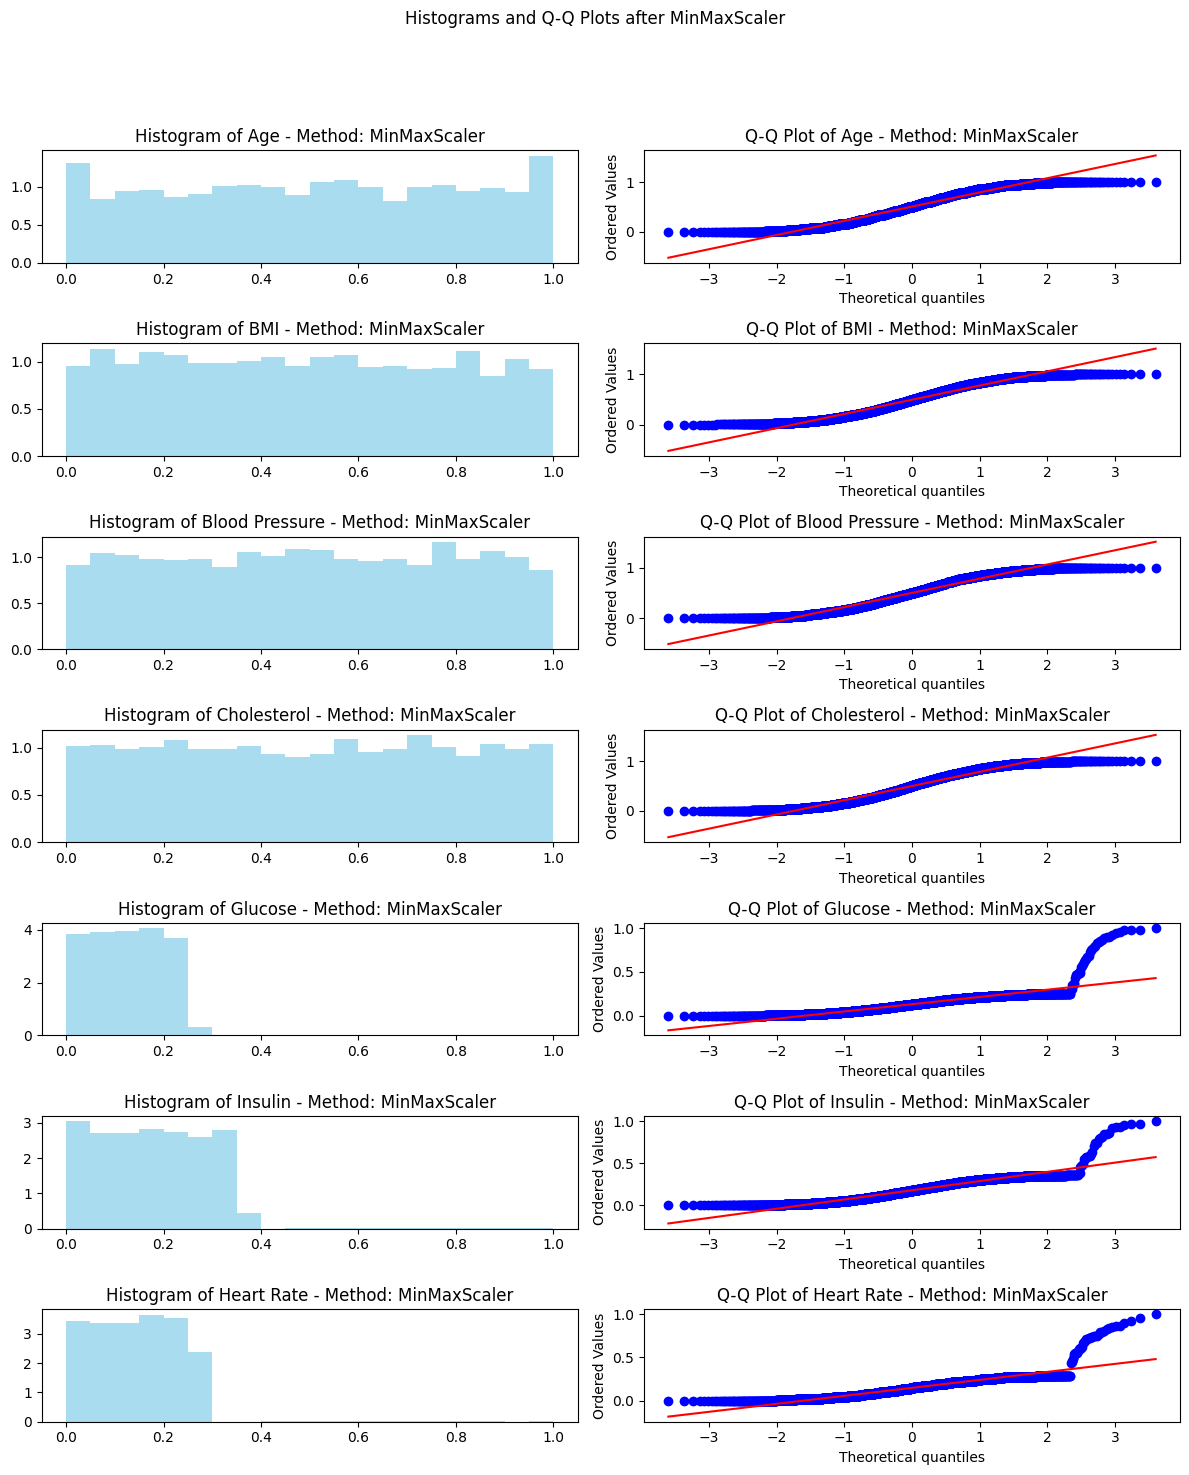

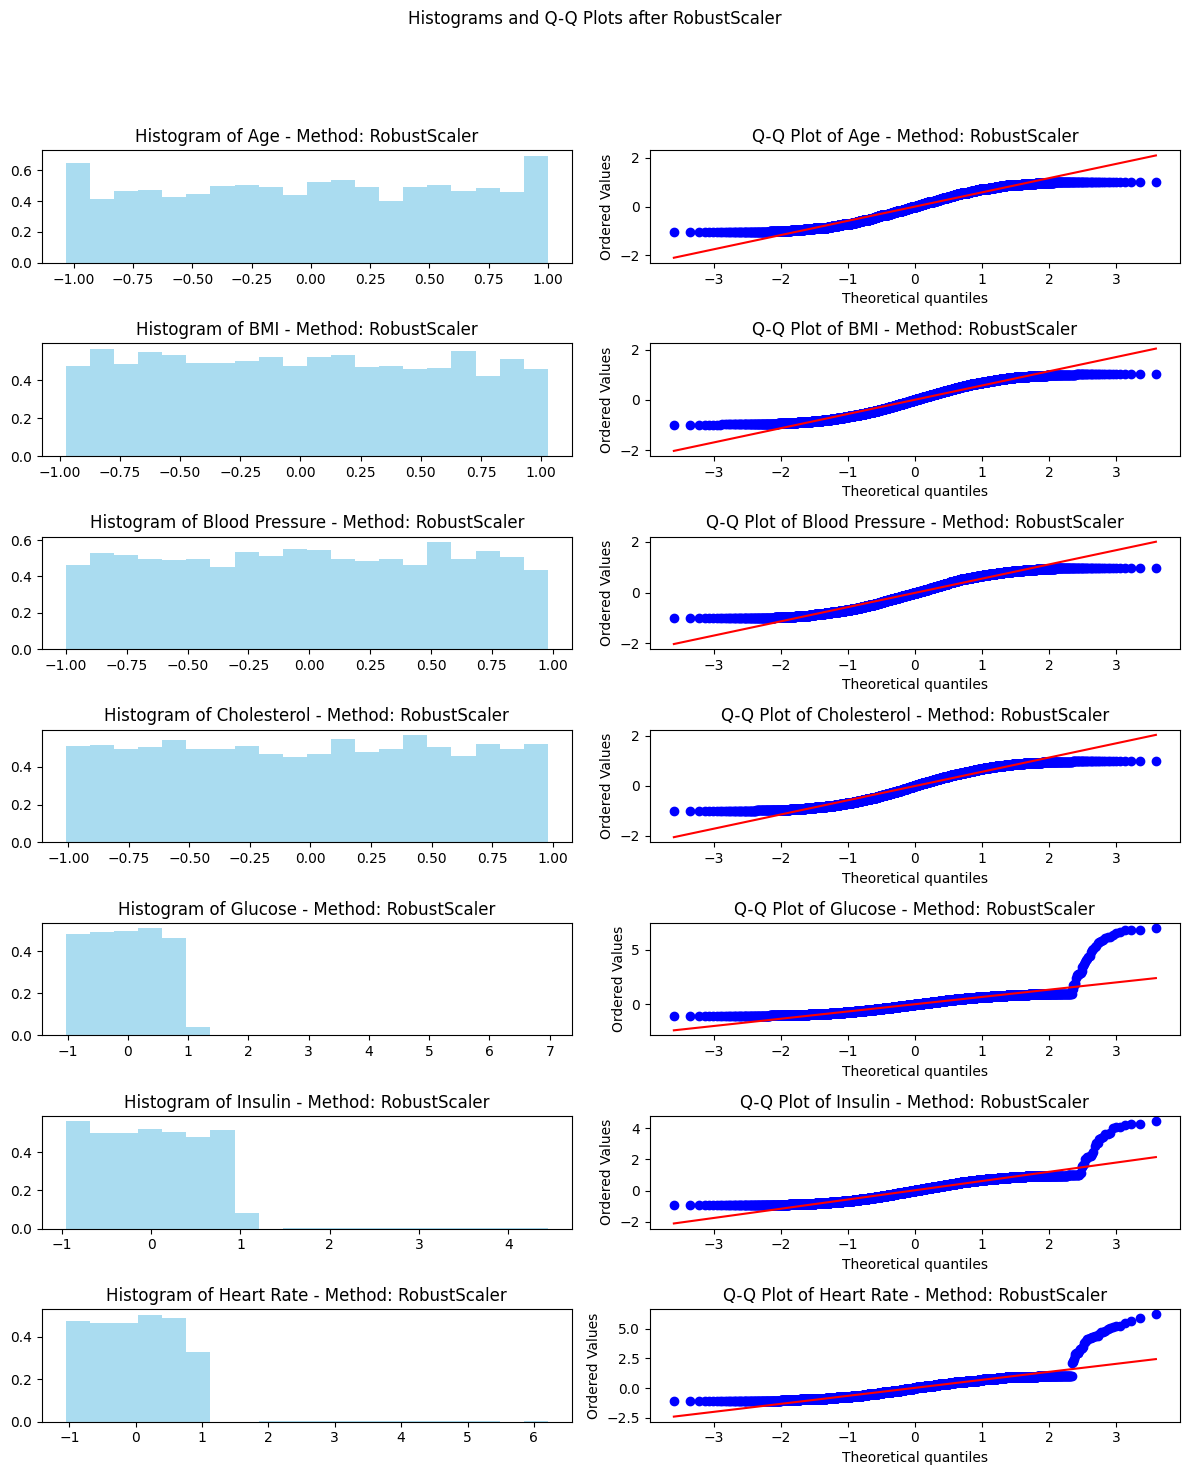

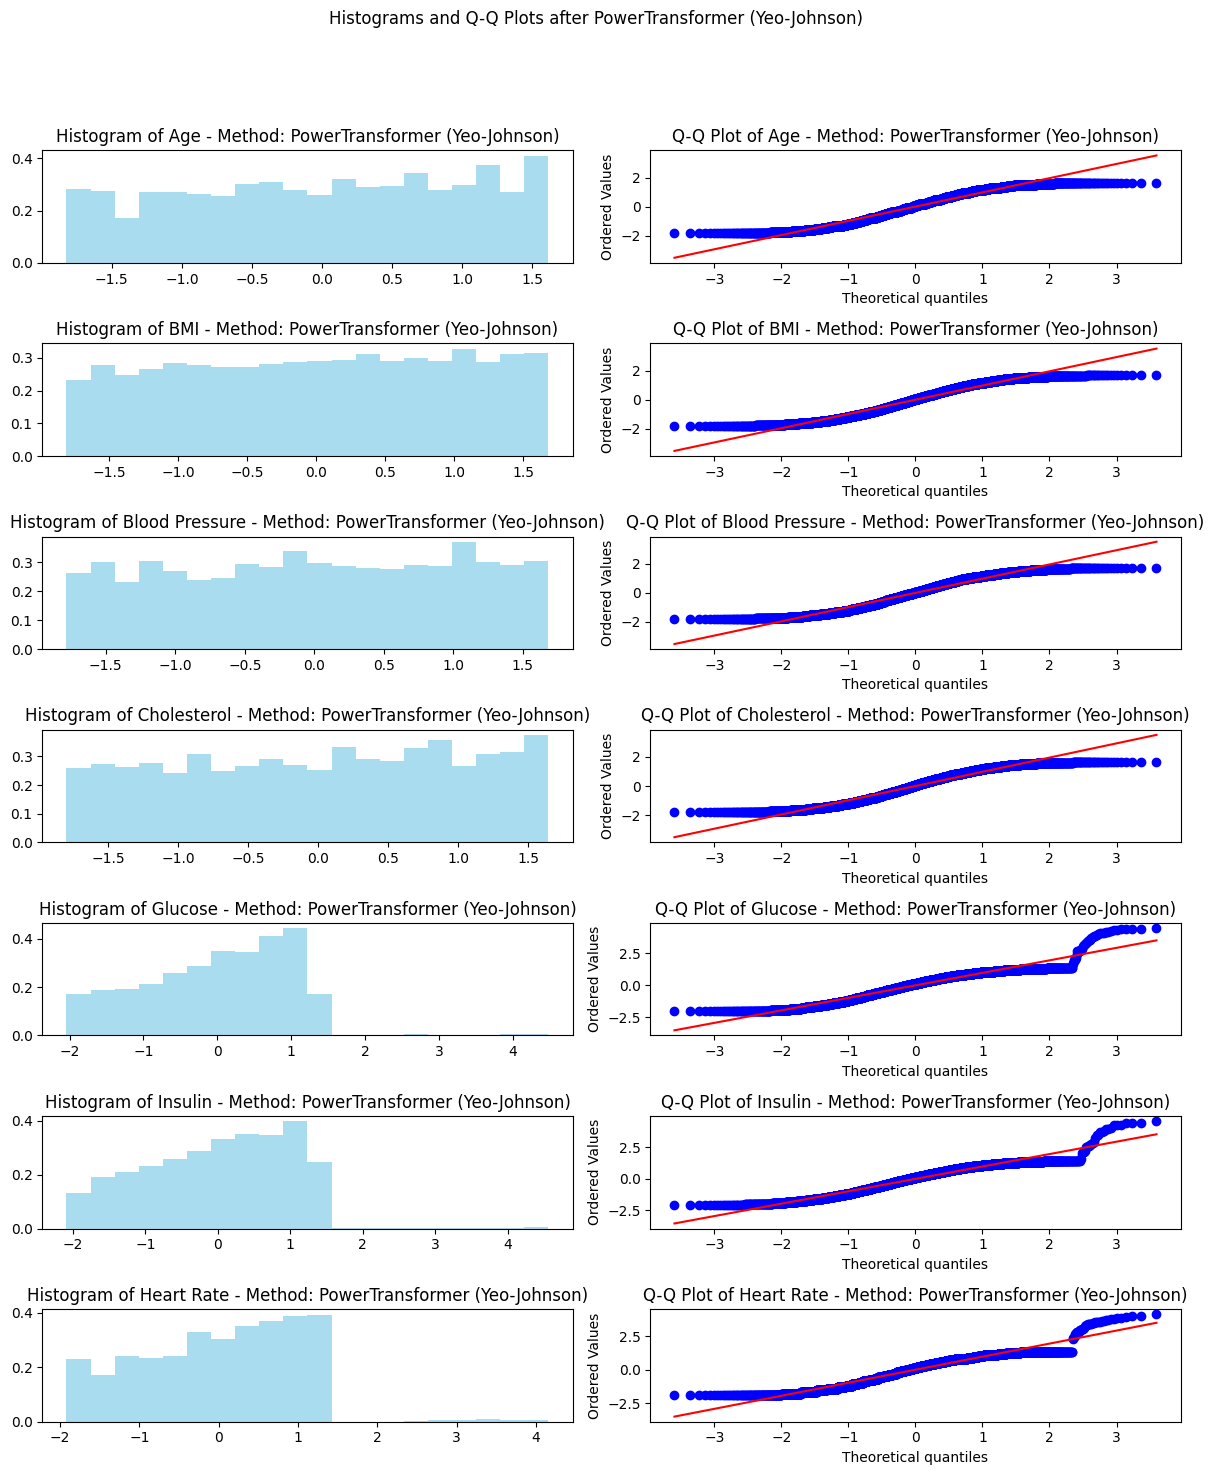

In [68]:
for scaler_name, scaler in scalers.items():
    df_scaled = pd.DataFrame(scaler.fit_transform(df_selected), columns=df_selected.columns)
    
    # Plot histogram for each column
    fig, axes = plt.subplots(len(df_selected.columns), 2, figsize=(12, 2 * len(df_selected.columns)))
    fig.suptitle(f'Histograms and Q-Q Plots after {scaler_name}', y=1.05)
    for i, col in enumerate(df_selected.columns):
        # Histogram
        axes[i, 0].hist(df_scaled[col], bins=20, density=True, alpha=0.7, color='skyblue')
        axes[i, 0].set_title('histogram of {col}')
        
        # Q-Q Plot
        stats.probplot(df_scaled[col], dist="norm", plot=axes[i, 1])
        axes[i, 1].set_title(f'Q-Q Plot of {col}')
        
        # Add the scaling method to the title
        axes[i, 0].set_title(f'Histogram of {col} - Method: {scaler_name}')
        axes[i, 1].set_title(f'Q-Q Plot of {col} - Method: {scaler_name}')

    plt.tight_layout()
    plt.show()

As we can see the best option for scaling this dataset is the Robust Scaler, because is a technique used to scale features of your dataset in a way that is less sensitive to outliers.

In [69]:
# df_to_scale = df2[columns_to_scale]

In [70]:
# power_scaler = PowerTransformer(method='yeo-johnson')

In [71]:
# df_scaled = pd.DataFrame(power_scaler.fit_transform(df_to_scale), columns=df_to_scale.columns)

In [72]:
# df4[columns_to_scale] = df_scaled

In [73]:
# df3=df2.copy()

In [74]:
# from sklearn.preprocessing import MinMaxScaler
# columns = ['Age','BMI', 'Blood Pressure','Cholesterol','Heart Rate','Insulin','Glucose']
# scaler = MinMaxScaler()
# df3[columns] = scaler.fit_transform(df3[columns])

In [75]:
# standard_scaler = StandardScaler()

In [76]:
# df5=df2.copy()

In [77]:
# df5[columns_to_scale] = standard_scaler.fit_transform(df2[columns_to_scale])

I'll create the list with the columns that I'll scale

In [78]:
columns_to_scale = ['Age', 'BMI', 'Blood Pressure', 'Cholesterol', 'Glucose', 'Insulin', 'Heart Rate']

The next steps are to apply the sizing to the columns I've selected. 

In [79]:
df_to_scale = df4[columns_to_scale]

In [80]:
robust_scaler = RobustScaler()

In [81]:
df_scaled = pd.DataFrame(robust_scaler.fit_transform(df_to_scale), columns=df_to_scale.columns)

In [82]:
df4[columns_to_scale] = df_scaled

In [83]:
df4.head(1)

,Age,BMI,Blood Pressure,Cholesterol,Glucose,Insulin,Heart Rate,Smoker,Physical Activity,Sleep Time,Medical History Score,Stress Level,Disease
0,0.233333,0.033403,-0.84,-0.93,-0.6875,0.2,-0.263158,0,1.0,9,5,0.0,1.0


## 5. Dimensional Reduction: PCA vs LDA

### 5.1 Principal Component Analysis (PCA)

"PCA reduces the number of dimensions in large datasets to principal components that retain most of the original information. It does this by transforming potentially correlated variables into a smaller set of variables, called principal components"(IBM)

I will use PCA module of sklearn library to perform PCA.

Before applying PCA, I will exclude the target label "Disease" because of the sense of PCA, we only apply it over independent variables

In [84]:
from sklearn.decomposition import PCA 

In [85]:
df_no_label = df4.drop("Disease", axis=1) 
pca = PCA().fit(df_no_label)

I will look at the cumulative explained variance for each number of features to determine the ideal number of PCA dimensions. I'll use the `explained_variance_ratio_} function to accomplish that. 

I will plot a line chart to see the cumulative explained variance ratio for the number of features.

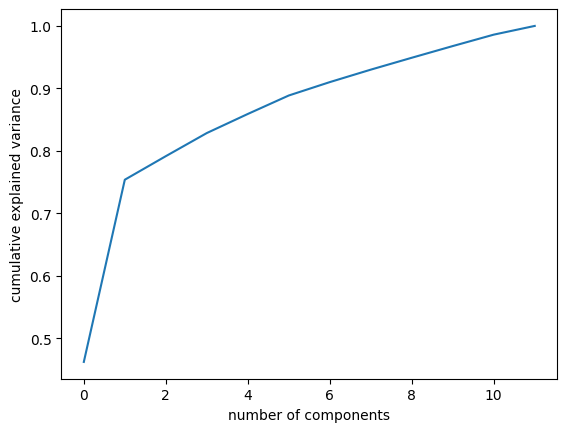

In [86]:
plt.plot(np.cumsum(pca.explained_variance_ratio_)) 
plt.xlabel('number of components') 
plt.ylabel('cumulative explained variance') 
plt.show() 

As can be seen in the figure above, we won't lose a lot of information if I set the PCA's maximum number of features (dimensions) to 8 because the cumulative explained variance hovers around 92%.

Now I will apply PCA with 8 dimentions over my data.

In [87]:
pca = PCA(8)
projected = pca.fit_transform(df_no_label)

In [88]:
projected.shape

(4297, 8)

Now, my data has 8 features that keep all the information that the original 15 columns have. 

I'll create a new dataset with the information of the 8 features.

In [89]:
df_pca = pd.DataFrame(projected, columns =['C1', 'C2','C3','C4','C5','C6','C7','C8'])

In [90]:
df_pca.head(1)

,C1,C2,C3,C4,C5,C6,C7,C8
0,0.510661,1.523839,-1.015154,0.249663,-0.640309,-0.503141,-0.107466,-0.084156


Now, add my target with the PCA dataset, followed by the sum of the PCA ratio to see how much it is covering in my dataset

In [91]:
df_pca["Disease"] = df4["Disease"]

In [92]:
df_pca.head()

,C1,C2,C3,C4,C5,C6,C7,C8,Disease
0,0.510661,1.523839,-1.015154,0.249663,-0.640309,-0.503141,-0.107466,-0.084156,1.0
1,-1.493130,1.517582,-0.306289,-0.908005,-0.276883,-0.656018,-0.210608,0.733432,0.0
2,0.562821,-2.474549,0.259601,0.787104,-1.030334,0.253556,0.418111,-0.149352,2.0
3,-4.468935,-0.519268,1.053224,-0.224713,0.519949,-0.810892,0.523090,-0.285935,2.0
4,-1.467993,-0.488518,0.359407,0.944587,0.127818,1.141148,-0.688243,-0.280354,1.0


In [93]:
pca.explained_variance_ratio_.sum()

0.9299776256874932

### 6.1. LDA (Linear Discriminant Analysis)

"Linear Discriminant Analysis can be used to perform supervised dimensionality reduction, by projecting the input data to a linear subspace consisting of the directions which maximize the separation between classes" (Scikit Learn)

I'll start by dividing my data set into two: X, which will be my target, and y, which will be the entire data set minus the target.

In [94]:
label = df4[['Disease']]

In [95]:
df_x=df4.drop(['Disease'], axis = 1)

In [96]:
X=df_x
y=label
y = y.values.ravel()

Import the LDA library for the sklearn.

I've tested with 2 components and with 3, and I got a better variance ratio with 3, so I'll follow that way.

In [97]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=3)
X_lda = lda.fit_transform(X, y)

In [98]:
lda.explained_variance_ratio_

array([0.53727505, 0.25613647, 0.20658847])

In [99]:
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
# lda = LDA(n_components=2)
# X_lda = lda.fit_transform(X, y)

In [100]:
# plt.figure(figsize=(8, 5))
# classes = np.unique(y)
# for class_value in classes:
#     plt.scatter(X_lda[y == class_value, 0], X_lda[y == class_value, 1], label=f'Disease {class_value}')
#     plt.xlabel('Linear Discriminant 1')
# plt.ylabel('Linear Discriminant 2')
# plt.title('LDA: Healthcare Dataset')
# plt.legend()
# plt.show()

Now I'll plot my LDA.

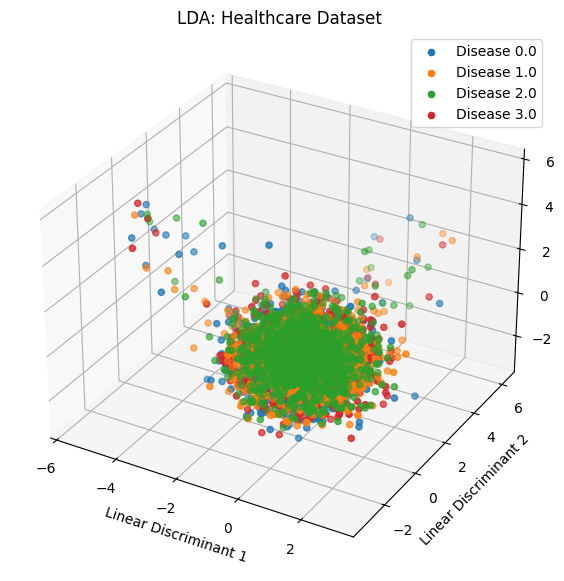

In [101]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')
classes = np.unique(y)
for class_value in classes:
    ax.scatter(X_lda[y == class_value, 0], X_lda[y == class_value, 1], X_lda[y == class_value, 2], label=f'Disease {class_value}')
    ax.set_xlabel('Linear Discriminant 1')
ax.set_ylabel('Linear Discriminant 2')
ax.set_zlabel('Linear Discriminant 3')
ax.set_title('LDA: Healthcare Dataset')
ax.legend()
plt.show()

As we can see in the graph above, Disease_2, which is Disease_C in the original dataset, overlaps with the other Diseases. This may be because LDA may not have been able to find components that separate the classes well, we can see this in the course of data exploration, which has always been very balanced. 

## 5.3. Accuracy LDA and PCA

I'll apply some machine learning models just to see the accuracy of the dataset.

Importing the libraries and spliting my dataset in train and test. 

In [102]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X_lda, y, test_size=0.2, random_state=42)


** About the test_size, I've applied 10% and also 30%, but with 20% the dataset has the best accuracy so I left like this. 

Applying the Model Logistic Regression

In [103]:
clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression()

In [104]:
y_pred = clf.predict(X_test)

Printing the results

In [105]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Confusion Matrix:
 [[67 49 36 55]
 [66 52 30 74]
 [76 52 44 48]
 [54 52 42 63]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.25      0.32      0.29       207
         1.0       0.25      0.23      0.24       222
         2.0       0.29      0.20      0.24       220
         3.0       0.26      0.30      0.28       211

    accuracy                           0.26       860
   macro avg       0.27      0.26      0.26       860
weighted avg       0.27      0.26      0.26       860

Accuracy Score: 0.2627906976744186


Accuracy of 26,27%, it is very low, followed by low precision and low recovery, which means that LDA is not suitable for capturing the complexity and separation of the classes present in this dataset.


Now I'll apply some machine learning models to my PCA.

In [106]:
df_array = df_pca.values

Splitting my data in train and test

In [107]:
from sklearn.model_selection import train_test_split
X = df_array[:,0:8]
y = df_array[:,8]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.30, random_state=1)

Import and apply the machine models

In [108]:
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import NearestCentroid
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [109]:
max_iter = 1000

In [110]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('RFC', RandomForestClassifier()))
models.append(('GBC', GradientBoostingClassifier()))
models.append(('MLP', MLPClassifier(max_iter=max_iter)))
models.append(('ETC', ExtraTreeClassifier()))
models.append(('BNB', BernoulliNB()))
models.append(('NC', NearestCentroid()))

In [111]:
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.255736 (0.022056)
LDA: 0.256070 (0.022292)
KNN: 0.250752 (0.020765)
CART: 0.250076 (0.021851)
NB: 0.245750 (0.021342)
SVM: 0.253410 (0.030085)
RFC: 0.248419 (0.018454)
GBC: 0.239126 (0.035681)
MLP: 0.250743 (0.030928)
ETC: 0.252744 (0.028369)
BNB: 0.243111 (0.016684)
NC: 0.248080 (0.019166)


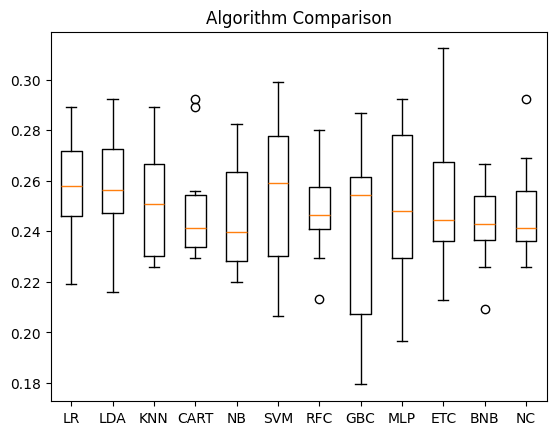

In [112]:
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

### 6. Conclusion

The dataset that was used in this project was about a healthcare organization that contains patient demographics, health metrics, treatment details, and follow-up outcomes across multiple departments. The main goal of this project was to explore, get some insights and preparing it for the machine learning models in order to improve treatment outcomes and predict which Disease the patient may have.

First, I started by exploring the data to characterize it. I identified the number of features and rows, as well as the types of values in the data, and then detected the fact that some columns have some missing values, so I converted them to None, so that I could easily exclude them from my dataset.
 
After that, I checked the outliers in the dataset, because they can affect some machine learning models, and there are some, but after doing some tests, I decided to keep them in the dataset, because they are medical data and if I deal with them by changing the information, I will be changing the customers' dat


 
Before applying dimensional reduction, I did the coding and sizing on the dataset and applied a heat map test to see if there was a correlation between some features, and there wasn't, to get a better result I chose to exclude two features, so in total my dataset has 4,297 rows and 13 features. More reliable and effective dimensionality reduction can be achieved by using PCA or LDA, particularly in datasets with a large number of features and classes (targets). LDA can concentrate on optimizing the separation between classes, whereas PCA can help prepare the data by eliminating noise and simplifying the dat

But But in this dataset, none of them works well, we got an accuracy very low which can be explained by the structure of the data, in which the relationship between features and classes is not captured by linear techniques or even by dimensionality reductions. 


## 7. Machine Learning

As we saw when preparing the data, the heatlhcare dataset has a target which is “Disease” and, when we have a target, we generally use supervised learning models.

"Supervised learning is used whenever we want to predict a certain outcome from a given input, and we have examples of input/output pairs. We build a machine learning model from these input/output pairs, which comprise our training set" (Müller and Guido)

### 7.1 Split, train and test

In [113]:
df2.head(2)

,Age,BMI,Blood Pressure,Cholesterol,Glucose,Insulin,Heart Rate,Smoker,Physical Activity,Sleep Time,Medical History Score,Income Level,Stress Level,Health Ins,Disease
0,56,27.577099,88.0,108.0,92,171,75,0,1.0,9,5,2.0,0.0,0,1.0
1,69,26.233744,88.0,252.0,102,179,71,0,2.0,9,3,2.0,1.0,1,0.0


Splitting my dataset into independent columns (X), dependent column (y)

In [114]:
X = df2.drop('Disease', axis=1)
y = df2['Disease']

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3437, 14), (860, 14), (3437,), (860,))

### 7.2. Feature Importances

"we use the term feature importance to describe how important the feature was for the classification performance of the model. More precisely, we refer to feature importance as a measure of the individual contribution of the corresponding feature for a particular classifier, regardless of the shape"(Saarela and Jauhiainen)

In this case, I chose to use the Random Forest method to identify the most important resources in our data set.
To begin with, I'll apply the model to my data set, which is already divided into dependent and independent variables, and then I'll apply the feature's importance and plot the graph to get a better view. 

In [116]:
rf = RandomForestClassifier()
rf.fit(X, y)

RandomForestClassifier()

In [117]:
feature_importances = rf.feature_importances_

In [118]:
sorted_indices = np.argsort(feature_importances)[::-1]

k will be 14, because I want to plot all my dataset. 

In [119]:
k = 14
top_k_features = X.columns[sorted_indices]

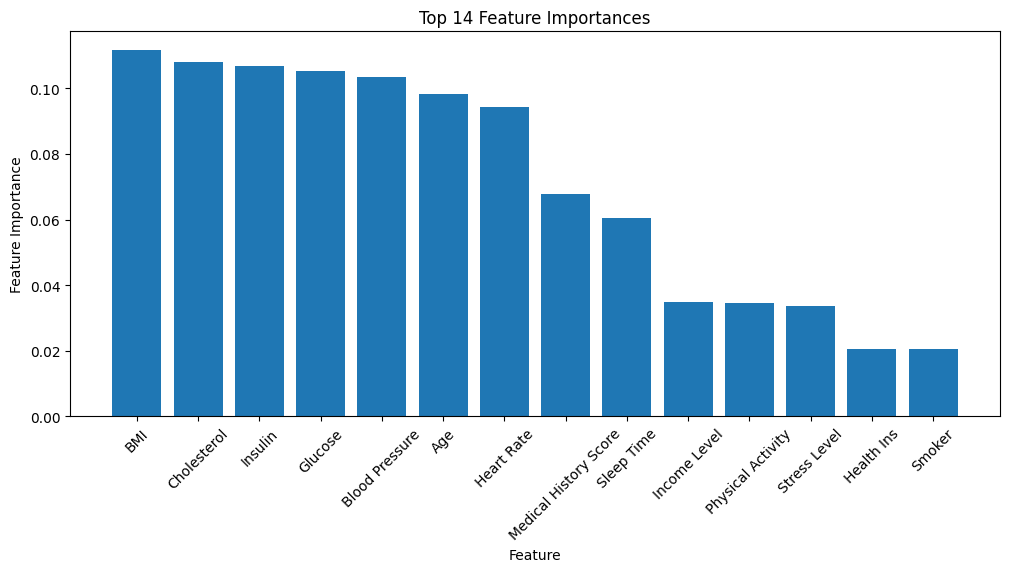

In [120]:
plt.figure(figsize=(12, 5))
plt.bar(range(len(top_k_features)), feature_importances[sorted_indices][:k], align='center')
plt.xticks(range(len(top_k_features)), top_k_features, rotation=45)
plt.xlabel('Feature')
plt.ylabel('Feature Importance')
plt.title('Top 14 Feature Importances'.format(k))
plt.show()

We can see that the first 7 columns have practically the same importance for the machine learning model, these columns are variable types as we have already seen in EDA, in some cases if we use only the most important features we can simplify the learning model, increasing accuracy and reducing overfitting. 

### 7.3. Hyperparameter

"In the context of machine learning, hyperparameters are configuration variables that are set before the training process of a model begins. They control the learning process itself, rather than being learned from the data. Hyperparameters are often used to tune the performance of a model, and they can have a significant impact on the model’s accuracy, generalization, and other metrics"(GeeksForGeeks)

I'll start using the GridSearchCV which helps in the process of performing the hyperparameter to determine the optimal values.

First of all, importing the necessary library, followed by defining the hyperparameter grid to test. 

In [121]:
from sklearn.model_selection import GridSearchCV

In [122]:
param_grid = {
    'n_estimators': [50, 100, 200],
      'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10,]
}

Applying the GridSearchCV in the Random Forest model, to check the accuracy. 

In [123]:
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=10, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 20, 30, None],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

Get the best parameters and best accuracy, and print them.

In [124]:
best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Accuracy:", best_accuracy)

Best Parameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 50}
Best Accuracy: 0.2673757542884263


How the accurancy is not good, I'll try another way of Hyperparameter tuning, which is Randomized Search CV.

The next steps are the same that I did for the Grid.

In [125]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [126]:
param_dist = {
    'n_estimators': randint(50, 200,300),
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': randint(2, 11,22),
    'min_samples_leaf': randint(1, 5),
    'max_features': ['sqrt', 'log2', None]}

In [127]:
rf = RandomForestClassifier()

In [128]:
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=100, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)

In [129]:
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 20, 30, 40],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x1474b24f0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x160373910>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x16b6135e0>},
                   random_state=42, scoring='accuracy')

Obtain the best hyperparameters, and print then.

In [130]:
best_params = random_search.best_params_
print("Best hyperparameters:", best_params)
best_rf = random_search.best_estimator_
accuracy = best_rf.score(X_test, y_test)
print("Accuracy with best hyperparameters:", accuracy)

Best hyperparameters: {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 28, 'n_estimators': 386}
Accuracy with best hyperparameters: 0.2593023255813954


In [131]:
# test with more machine learning models, but didn't work. 
# param_grids = {
#     'RandomForest': {
#         'n_estimators': [50, 100, 200],
#         'max_depth': [10, 20, 30, None],
#         'min_samples_split': [2, 5, 10],
#         'min_samples_leaf': [1, 2, 4],
#         'max_features': ['auto', 'sqrt', 'log2']},
#     'SVC': {
#         'C': [0.1, 1, 10, 100],
#         'gamma': [1, 0.1, 0.01, 0.001],
#         'kernel': ['linear', 'rbf']},
#     'GradientBoosting': {
#         'n_estimators': [50, 100, 200],
#         'learning_rate': [0.01, 0.1, 0.2],
#         'max_depth': [3, 6, 9]},
#     'KNN': {
#         'n_neighbors': [3, 5, 7, 9],
#         'weights': ['uniform', 'distance'],
#         'metric': ['euclidean', 'manhattan']},
#     'LogisticRegression': {
#         'C': [0.01, 0.1, 1, 10, 100],
#         'penalty': ['l1', 'l2'],
#         'solver': ['liblinear']}}
# models = {
#     'RandomForest': RandomForestClassifier(random_state=42),
#     'SVC': SVC(random_state=42),
#     'GradientBoosting': GradientBoostingClassifier(random_state=42),
#     'KNN': KNeighborsClassifier(),
#     'LogisticRegression': LogisticRegression(random_state=42, max_iter=1000)}
# best_estimators = {}
# for model_name in models:
#     print(f"Training {model_name}...")
#     grid_search = GridSearchCV(estimator=models[model_name], param_grid=param_grids[model_name], cv=10, scoring='accuracy', n_jobs=-1)
#     if model_name == 'KNN':
#         grid_search.fit(X_train_scaled, y_train)
#     else:
#         grid_search.fit(X_train, y_train)
#     best_estimators[model_name] = grid_search.best_estimator_
#     print(f"Best parameters for {model_name}: {grid_search.best_params_}")
#     accuracy = grid_search.score(X_test_scaled if model_name == 'KNN' else X_test, y_test)
#     print(f"Accuracy for {model_name} with best parameters: {accuracy}\n")
# for model_name, model in best_estimators.items():
#     if model_name == 'KNN':
#         y_pred = model.predict(X_test_scaled)
#     else:
#         y_pred = model.predict(X_test)
#     print(f"Results for {model_name}:")
#     print(f"Accuracy score: {accuracy_score(y_test, y_pred)}")
#     print(classification_report(y_test, y_pred))
#     print("\n")

Both hyperparameter tuning models have low accuracy, I tried some tests within the Random Forest itself, changing the parameters informed in the Grid and Randomized, but I didn't see much improvement in accuracy, and always takes too much time to load the changings, I also tried to apply these two hyperparameter tuning models with other machine learning models, but I believe that because it is a large dataset, and the other models are more robust, I didn't get any results, because Python kept loading for more than 30 minutes, I left a comment on my notebook to serve as a record, as I didn't get much improvement I decided to move on to the machine learning models without applying any hyperparameter tuning.

### 7.4. Training and Testing the Models

I will make two different splits of the data set, 30/70 which means 30% test and 70% train. 
20/80 which means 20% test and 80% train. 

In [132]:
from sklearn.model_selection import train_test_split, cross_val_score

In [133]:
#first slip
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.3, random_state=42)
#second slip
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.2, random_state=42)

In [134]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [135]:
from tabulate import tabulate
def fit_predict_score(model, X_train, y_train, X_test, y_test):
    """Fit the model, predict for test data, and returns classification metrics."""
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    precision = precision_score(y_test, y_pred, average='micro')
    recall = recall_score(y_test, y_pred, average='micro')
    f1 = f1_score(y_test, y_pred, average='micro')
    return train_score, test_score, precision, recall, f1

def model_comparison(models, X_trains, y_trains, X_tests, y_tests):
    """Creates a DataFrame comparing the provided models using the given testing sets."""
    results = []

    for model in models:
        for i, (X_train, y_train, X_test, y_test) in enumerate(zip(X_trains, y_trains, X_tests, y_tests)):
            train_score, test_score, pr, re, f1 = fit_predict_score(model, X_train, y_train, X_test, y_test)
            results.append((model.__class__.__name__, i + 1, train_score, test_score, pr, re, f1))

    model_comparison_df = pd.DataFrame(results, columns=['Model', 'Split', 'Training Score', 'Test Score (Accuracy)', 'Precision', 'Recall', 'F1 Score'])
    return model_comparison_df

#Splitting the data into training and test sets for both splits
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.3, random_state=42)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.2, random_state=42)

# list with the machine learning models
models = [
    RandomForestClassifier(),
    KNeighborsClassifier(),
    SVC(),
    GradientBoostingClassifier(),
    XGBClassifier()]

# Lists of all training and test sets
X_trains = [X_train1, X_train2]
y_trains = [y_train1, y_train2]
X_tests = [X_test1, X_test2]
y_tests = [y_test1, y_test2]

# Model comparison results
results = model_comparison(models, X_trains, y_trains, X_tests, y_tests)

print(tabulate(results, headers='keys', tablefmt='grid'))

+----+----------------------------+---------+------------------+-------------------------+-------------+----------+------------+
|    | Model                      |   Split |   Training Score |   Test Score (Accuracy) |   Precision |   Recall |   F1 Score |
+====+============================+=========+==================+=========================+=============+==========+============+
|  0 | RandomForestClassifier     |       1 |         1        |                0.246512 |    0.246512 | 0.246512 |   0.246512 |
+----+----------------------------+---------+------------------+-------------------------+-------------+----------+------------+
|  1 | RandomForestClassifier     |       2 |         1        |                0.25814  |    0.25814  | 0.25814  |   0.25814  |
+----+----------------------------+---------+------------------+-------------------------+-------------+----------+------------+
|  2 | KNeighborsClassifier       |       1 |         0.496841 |                0.244961 |    0.2

Let’s understand these results:

Training scores are the accuracy of the model with the training data. 
Test Scores are the accuracy of the model with the test data. 
Precision, recall and F1 Score are they are like extra measures to check the performance of the model, they work better with imbalanced data, but that is not  case. 

. 
If we take a look at the Random Forest classifier, we see an excellent training score of 1.0 in both divisions, but on the other hand, the test scores are very low, 0.25 and 0.23, which means that this model has been overfitted, which happens when a model fits the training data very well, even capturing its random fluctuatio
ns. We can see that almost the same thing happened with XGB Classifier: great training scores, but low test accura
cy. 
In the other three models, we can see low scores in training and testing, which means that the model does not fit the data set 

well.
 In some cases, if the environment in which the model will be applied is very similar to that of the training data, the impact of overfitting may be less, so I’ll try apply a machine learning model to see if  I’ll get a good prediction. 


### 7.5. Random Forest Classifier

I'll do a test using X_train and y_train to see if the prediction is correct or not. 

In [136]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [137]:
y_pred = rf.predict(X_test)

In [138]:
comparison_df = pd.DataFrame({'Real': y_test, 'Predicted': y_pred})

print(comparison_df)

      Real  Predicted
1860   0.0        3.0
2743   0.0        3.0
1964   0.0        3.0
2323   0.0        0.0
3619   2.0        1.0
...    ...        ...
3571   0.0        1.0
3400   0.0        2.0
1188   1.0        2.0
2500   0.0        3.0
2182   2.0        2.0

[860 rows x 2 columns]


We can see that, in reality, Random Forest machine learning model doesn't make a good prediction.

### 7.6. SVC (Support Vector Classifier)

I'll try to apply the SVC machine learning model to see the forecast. 

In [140]:
svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
comparison_df = pd.DataFrame({'Real': y_test, 'Predicted': y_pred})
print(comparison_df)

      Real  Predicted
1860   0.0        1.0
2743   0.0        1.0
1964   0.0        2.0
2323   0.0        3.0
3619   2.0        2.0
...    ...        ...
3571   0.0        1.0
3400   0.0        0.0
1188   1.0        3.0
2500   0.0        1.0
2182   2.0        1.0

[860 rows x 2 columns]


## 8. Machine Learning Conclusion

As we saw in the data preparation, using PCA and LDA wouldn't be the best choice for this dataset, so I chose to use the original dataset, just excluding the null values and adjusting the columns that were objects to categorical.


I searched for the most important columns for the dataset, using the Random Forest machine learning model, and we noticed that the most important ones were those related to the customer's demographics, such as cholesterol, glucose, BMI, etc.

 
I then applied two hyperparameter techniques, Grid and Randomized, where even when adjusting the parameters I didn't see a significant improvement. I tried applying them to more machine learning model options at the same time and didn't get any feedback, so I left a comment in the notebook for the record
. 
After that, I separated the dataset into two splits with different test values, one with 20% and the other with 30%, and applied the chosen machine learning models.
We have some options to try to get better accuracy, as trying to collect more data, studying the possibility of creating new resources that can help improve performance, studying the possibility of other hyperparameter adjustment techniques, because the ones applied in this study were not successful, we would have the option of applying some data balancing technique, but we have already seen during the EDA that the data is balanced. I’ve tried to apply the Random Forest and SVC model with my test dataset, but again the prediction wasn't good. 

To conclude, I believe that the best options for the helthcare company are to collect more data, or to study the possibility of including more columns with relevant data that can help improve the reliability of our chosen machine learning models.
